# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [12]:
!pip install tabulate

In [14]:
import csv
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import sys
import matplotlib.pyplot as plt
from tabulate import tabulate

In [15]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)

In [16]:
x = []
y = []
for i in range(len(all_molecules)):
  x.append(all_molecules[i][0])
  y.append(all_molecules[i][1])
x = sc.fit_transform(x)
del all_molecules

In [17]:
num_train = int(len(x) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = x[:num_train]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = y[:num_train]

x_test = x[num_train:]
y_test = y[num_train:]

del x,y

In [18]:
print(x_test.shape)
print()
x_train.shape

(22, 4)



(87, 4)

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
1. Pre-process the Data and Prepare the train_test Split set.
2. Define the cost function for the fit.
```
y_pred = W0 + W1 * X1 + W2 * X2 + W3 * X3 + W4 * X4 
J(x,w) = sum over x[( y_pred - Y_actual ) ^ 2]
```
3. Define Gradient descent Function
```
W(t+1) = W(t) - LearningRate * J'(x,w)
J'(x,w) = [ (y_pred - y_actual)x ] / len(dataset)
```
4. Start Gradient descent for Arbitary Weights vector and Arbitary Learning Rate until Cost function value becomes consitent.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [19]:
# implement Linear Regression
def cost_function(x,y,w,bias):
  #print(len((x.dot(w) + w0 - y)**2))
  cost = np.sum((np.dot(x,w) + bias - y)**2) / (2*len(x))
  return cost

In [20]:
def Gradient_descent(x,y,w,bias,learning_rate):
  y_pred = x.dot(w) + bias
  loss = y_pred - y
  w = w - learning_rate * (np.dot(x.transpose(),loss) / len(x) )
  bias = bias - learning_rate * np.sum(loss) / len(x)
  return w,bias

In [28]:
"""Linear Regression, this program till the cost value saturates, epochs are not fixed. It may be different for differt intial variables"""
def Linear_regression(x,y,w,bias,learning_rate):
  cost_vector = []
  prev_cost = sys.maxsize
  while True:
    w,bias = Gradient_descent(x,y,w,bias,learning_rate)
    cost = cost_function(x,y,w,bias)
    cost_vector.append(cost)
    if prev_cost - cost < 0.00000001 :
      break
    prev_cost = cost
  return w,bias,cost_vector

In [24]:
"""Here we are performing Linear Regression with different combination of Learning rates and weight parameters""" 

learning_rate = [0.1,0.08,0.05,0.01,0.005,0.002,0.001,0.0005]
weights = [0,0.5,1,2]
location = 0
w_dist = {}
bias_dict = {}
cost_vector_dict = {}
alpha_dict = {}
weight_dict = {}
for alpha in learning_rate:
  for weight in weights:
    w,bias,cost_vector = Linear_regression(x_train,y_train,[weight for i in range(x_train.shape[1])], weight, alpha)
    w_dist[location] = w
    bias_dict[location] = bias
    cost_vector_dict[location] = cost_vector
    alpha_dict[location] = alpha
    weight_dict[location] = weight
    a = len(weights)
    b= len(learning_rate)
    # plt.subplot(a*b,1,location+1)
    # plt.plot(cost_vector)
    location += 1
#plt.show()

In [25]:
"""After performing the Experiments with different Intial Parameters and Learning rate, where I get the min cost, I take that Intial Parameters and Learning rate"""

table_data = []
min_cost = sys.maxsize
opt_alpha = 0
opt_weight = 0
final_para = 0
for i in range(0,location):
  row = []
  row.append(w_dist[i])
  row.append(bias_dict[i])
  row.append(len(cost_vector_dict[i]))
  row.append(cost_vector_dict[i][-1])
  if cost_vector_dict[i][-1] < min_cost:
    min_cost = cost_vector_dict[i][-1]
    opt_alpha = alpha_dict[i]
    opt_wieght = weight_dict[i]
    final_para = w_dist[i]
    final_bias = bias_dict[i]
  table_data.append(row)
head = ["weights","bias","Epoachs","Cost Value"]
print(tabulate(table_data, head, tablefmt="grid"))
print("Optminal Learning rate:",opt_alpha,"Optimanl Intial weights:",opt_weight)
print("Final Weights",final_para,"Final Bias",final_bias)

+---------------------------------------------------+---------+-----------+--------------+
| weights                                           |    bias |   Epoachs |   Cost Value |
+===================================================+=========+===========+==============+
| [-0.01118438 -0.03111899  0.3927502   0.18751888] | 1.95029 |       143 |   0.00148897 |
+---------------------------------------------------+---------+-----------+--------------+
| [-0.01083159 -0.03026396  0.3936821   0.18777407] | 1.9504  |       145 |   0.00148897 |
+---------------------------------------------------+---------+-----------+--------------+
| [-0.01083132 -0.03025713  0.39369902  0.18777283] | 1.95041 |       168 |   0.00148897 |
+---------------------------------------------------+---------+-----------+--------------+
| [-0.01083634 -0.03026839  0.39368839  0.1877688 ] | 1.9504  |       187 |   0.00148897 |
+---------------------------------------------------+---------+-----------+--------------+

In [26]:
w,bias,cost_vector = Linear_regression(x_train,y_train,[opt_weight for i in range(x_train.shape[1])], opt_weight, opt_alpha)

*Best Learning Rate: **0.1** For minimun RMSE*

In [67]:
print("After Performing the Experiments with differn Learning rates, the Best learning rate is: ",opt_alpha," Fro which RMSE is minimal")

After Performing the Experiments with differn Learning rates, the Best learning rate is:  0.1  Fro which RMSE is minimal


Number of epochs: 143


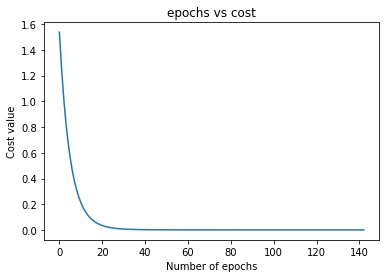

Weight vector: [-0.01118438 -0.03111899  0.3927502   0.18751888]


In [30]:
print('Number of epochs:',len(cost_vector))
plt.plot(cost_vector)
plt.xlabel("Number of epochs")
plt.ylabel("Cost value")
plt.title("epochs vs cost")
plt.show()
print("Weight vector:",w)

In [31]:
"""Predicting the y-label using the optimal Parameters"""
y_pred = []
for item in x_test:
 result = np.dot(final_para,item)+final_bias
 y_pred.append(result)

In [65]:
for i in range(len(y_test)):
  print(y_pred[i] - y_test[i])

0.12323645641711267
-0.06006726049739175
-0.23435540718096215
-0.07340775160436985
-0.07113423200435953
-0.030906224562496476
0.026322822178606486
-0.10441160318121012
0.08459658193509245
0.1194393831989824
0.01650482195084435
-0.030443438718584792
-0.022451451359577712
-0.016716032729946484
-0.07678045269274936
-0.06160731960205923
-0.03890365904621884
-0.048461131036748206
0.46794400457478913
-0.14011020713926037
0.015540535999429395
0.028189308637925903


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

Root Mean Square Error: 0.13026419629963065


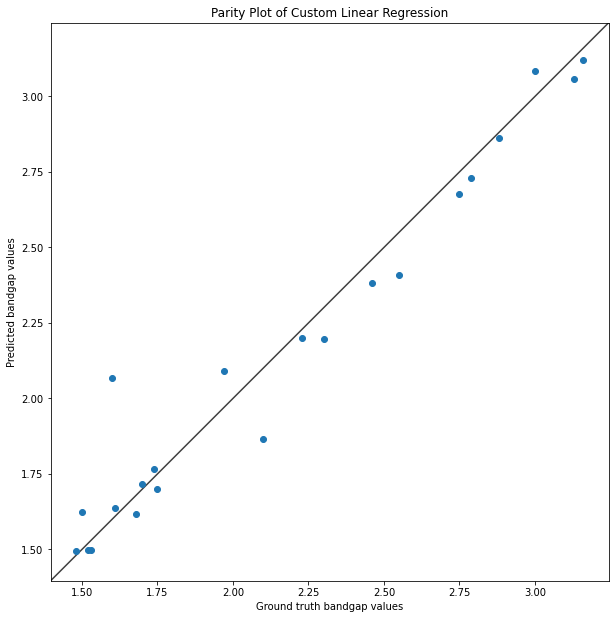

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
rmse1 = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",rmse1)
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
*     Ridge regression is an extention for normal Linear Regression. The cost function of the Linear Regression is modified to minimize the complexity of the Model. 
*     The Modificaion is done by adding a penality parameter to the cost function, the square of magnitude of parameters.

```
Cost Function = min Σ(y_pred - y)^2 + α ( W0 ^2 + W1^2 + W2^2 + ....)
```
-     Hence ridge regression reduces the magnitudes of the coefficients that will help in decreasing the complexity of the model.
   

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [34]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from tabulate import tabulate
 
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

+-------------------+--------------+---------------------------------------------------+
|   alpha values(α) |   RMSE Score | Weight Parametrs / Model Coefficients             |
+===================+==============+===================================================+
|             0.001 |     0.130149 | [-0.01101314 -0.03069849  0.39321529  0.18763883] |
+-------------------+--------------+---------------------------------------------------+
|             0.002 |     0.130149 | [-0.01101315 -0.03070108  0.39320783  0.18763615] |
+-------------------+--------------+---------------------------------------------------+
|             0.005 |     0.130148 | [-0.0110132  -0.03070884  0.39318544  0.1876281 ] |
+-------------------+--------------+---------------------------------------------------+
|             0.008 |     0.130147 | [-0.01101324 -0.0307166   0.39316305  0.18762005] |
+-------------------+--------------+---------------------------------------------------+
|             0.01  |

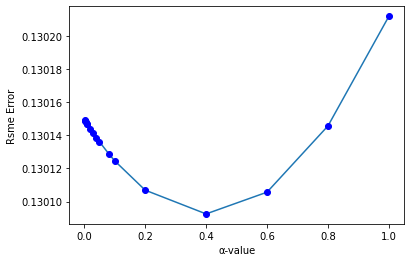

In [59]:
alpha = [0.001,0.002,0.005,0.008,0.01,0.02,0.03,0.04,0.05,0.08,0.1,0.2,0.4,0.6,0.8,1]
values = []
header = ["alpha values(α)","RMSE Score","Weight Parametrs / Model Coefficients"]
for value in alpha:
  rr = Ridge(alpha=value)
  rr.fit(x_train, y_train)
  pred_test_rr= rr.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test,pred_test_rr))
  temp = [value,rmse,rr.coef_]
  values.append(temp)
print(tabulate(values, header, tablefmt="grid"))
plt.plot(alpha,[row[1] for row in values])
plt.plot(alpha,[row[1] for row in values],'bo')
plt.ylabel("Rsme Error")
plt.xlabel("α-value")
plt.show()

Effect of α:
-   We Perform Regularation to avoid ovefitting, and reduce the complexity of the model.
-   If we set the hyperparameter alpha to some large number, The coefficients will be zero. Because of the large weightage on square of coefficients, anything less than zero will make the objective large.
-   Or If we set the α value very low or equal to Ο, then the model becomes same as Normal Linear Regression.
-   The magnitude of α will decide the weightage given to different parts of objective

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

*     Lasso regression is an extention for normal Linear Regression. The cost function of the Linear Regression is modified to minimize the complexity of the Model. Also called as **Least Absolute Shrinkage and Selection Operator** 
*     The Modificaion is done by adding a penality parameter to the cost function, the Sum of Absolute values of the magnitude of Weight Parameters.


```
Cost Function = min Σ(y_pred - y)^2 + α ( |W0| + |W1| + |W2| + ....)
```
-  In the case of lasso regression, apart from reducing the complexity of the model, it helps in automatic feature selection also. Lasso regression transforms the coefficient values to zero. The feature whose coefficients become equal to zero is less important in predicting the target variable and hence it can be dropped from the model. 
-     Which may also result in reducing the accuracy of the model by omiting some features by loosing Information.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

+-------------------+--------------+---------------------------------------------------+
|   alpha values(α) |   RMSE Score | Weight Parametrs / Model Coefficients             |
+===================+==============+===================================================+
|             0.001 |     0.13039  | [-0.00950295 -0.02977428  0.39215714  0.18661415] |
+-------------------+--------------+---------------------------------------------------+
|             0.002 |     0.13069  | [-0.00799019 -0.02885081  0.39109211  0.18558689] |
+-------------------+--------------+---------------------------------------------------+
|             0.005 |     0.131944 | [-0.00345192 -0.02608042  0.38789702  0.18250513] |
+-------------------+--------------+---------------------------------------------------+
|             0.008 |     0.133734 | [-0.         -0.02363824  0.38461385  0.17948288] |
+-------------------+--------------+---------------------------------------------------+
|             0.01  |

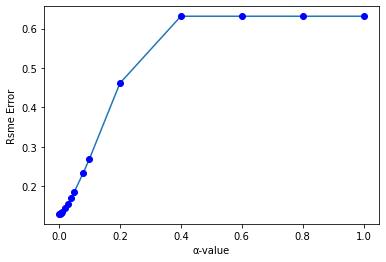

In [60]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
values1 = []
header1 = ["alpha values(α)","RMSE Score","Weight Parametrs / Model Coefficients"]
for value in alpha:
  lasso = Lasso(value)
  lasso.fit(x_train, y_train)
  pred_test_lasso= lasso.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
  temp = [value,rmse,lasso.coef_]
  values1.append(temp)
print(tabulate(values1, header1, tablefmt="grid"))
plt.plot(alpha,[row[1] for row in values1])
plt.plot(alpha,[row[1] for row in values1],'bo')
plt.ylabel("Rsme Error")
plt.xlabel("α-value")
plt.show()

We can Observe the Difference Between the Ridge and Lasso for the same set of alpha values:
-      In case of Lasso the wieght parameters are becoming Zero as the the α value increasing. 
-      For Higher α, in trying to find the minimum value for the cost function, the model will set the coefficients to 0. In other words, the regression line will have a slope of 0, so we have find the suitable α for the model.
-      In the table Printed above the coefficients are becoming Zeros at higher alpha values.